[Registro de asistencia a asesoría](https://forms.gle/FNg7WMenKvcgEh2T6)

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/fundamentos_logica/blob/main/4_fase_1_diagnostico_planificacion/0_formatos_clase/1_class_logica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/fundamentos_logica/blob/main/4_fase_1_diagnostico_planificacion/0_formatos_clase/1_class_logica.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Prompt 

Dame un diseño, para evaluar de manera manuscrita, a mis estudiantes del curso de Análisis Numérico sobre los temas de "Interpolación lineal y cuadrática, regresión lineal y cuadrática y diferenciación numérica". El parcial debe tener 5 puntos y con un nivel profesional para evaluar a futuros docentes de matemáticas de la Universidad de Antioquia. Diséñamelo, de tal manera que los datos de cada punto, se le indique a cada estudiante, como generarlos a partir de su documento de identidad, para evitar problemas de fraude durante la realización del parcial de dos horas.   



Temas a evaluar en este parcial:  



* **Interpolación lineal**
* **Interpolación cuadrática (Lagrange o Newton)**
* **Regresión lineal y cuadrática**
* **Diferenciación numérica (adelante, atrás, centradas, orden del error)**



# **Parcial manuscrito — Análisis Numérico**



# **“Interpolación, regresión y diferenciación numérica”**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sympy import symbols, interpolate
from IPython.display import display


# **PUNTO 1 — Interpolación Lineal**

In [ ]:
import numpy as np 
import pandas as pd 
x = np.array([2,4])
y = np.array([1,3]) 

df1 = pd.DataFrame({"x": x, "y": y})
df1


In [ ]:
import matplotlib.pyplot as plt 
from sympy import * 
# Gráfico de los datos
plt.figure(figsize=(6,4))
plt.scatter(x, y, color="blue")
plt.title("Datos para interpolación lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.savefig(r"C:\Users\marco\Downloads\datos_interpolacion_lineal.png")
plt.show()


In [ ]:

# Interpolación lineal con SymPy
t = symbols('t')
poly_lin = interpolate([(x[0], y[0]), (x[1], y[1])], t)

print("Polinomio de interpolación lineal:")
poly_lin


In [ ]:

# Predicción
x_pred = 2.75
y_pred = poly_lin.subs(t, x_pred)
print(f"Predicción en x = {x_pred}:  y = {float(y_pred)}")


In [ ]:

# Gráfico del modelo
t_vals = np.linspace(x[0]-1, x[1]+1, 200)
y_vals = [poly_lin.subs(t, val) for val in t_vals]

plt.figure(figsize=(6,4))
plt.plot(t_vals, y_vals, label="Interpolación lineal")
plt.scatter(x, y, color="red")
plt.scatter([x_pred], [y_pred], color="green", label="Predicción")
plt.legend()
plt.grid(True)

plt.savefig(r"C:\Users\marco\Downloads\interpolacion_lineal.png")
plt.show()



# **PUNTO 2 — INTERPOLACIÓN CUADRÁTICA**


In [ ]:
import numpy as np 
import pandas as pd

x = np.array([1,   2, 5])
y = np.array([4.5, 3, 7])

df2 = pd.DataFrame({"x": x, "y": y})
df2


In [ ]:
import matplotlib.pyplot as plt 
# Gráfico de datos
plt.figure(figsize=(6,4))
plt.scatter(x, y, color="purple")
plt.title("Datos para interpolación cuadrática")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.savefig(r"C:\Users\marco\Downloads\datos_interpolacion_cuadratica.png")
plt.show()


In [ ]:

# Interpolación cuadrática con SymPy
from sympy import *
t = symbols('t')
poly_quad = interpolate([(x[i], y[i]) for i in range(3)], t)
poly_quad


In [ ]:
17/24, -29/8, 89/12 

In [ ]:

# Predicción
x_pred = x[0]+x[2]-x[1]
y_pred = poly_quad.subs(t, x_pred)
print(f"Predicción en x = {x_pred}:  y = {float(y_pred)}")


In [ ]:

# Gráfico del modelo
t_vals = np.linspace(x1-1, x3+1, 300)
y_vals = [poly_quad.subs(t, val) for val in t_vals]

plt.figure(figsize=(6,4))
plt.plot(t_vals, y_vals, color="black", label="Interpolación cuadrática")
plt.scatter(x, y, color="red")
plt.scatter([x_pred], [y_pred], color="green", label="Predicción")
plt.grid(True)
plt.legend()
plt.show()



# **PUNTO 3 — REGRESIÓN LINEAL**


In [3]:
# "\n\n=== PUNTO 3: REGRESIÓN LINEAL ===")

import numpy as np # cálculo numérico 
import pandas as pd  # tablas 
import seaborn as sns # graficación  


In [4]:
# Datos
x = np.array([1, 2, 3, 4])

y = np.array([2, 1, 4, 9])

df3 = pd.DataFrame({"x": x, "y": y})
df3


,x,y
0,1,2
1,2,1
2,3,4
3,4,9


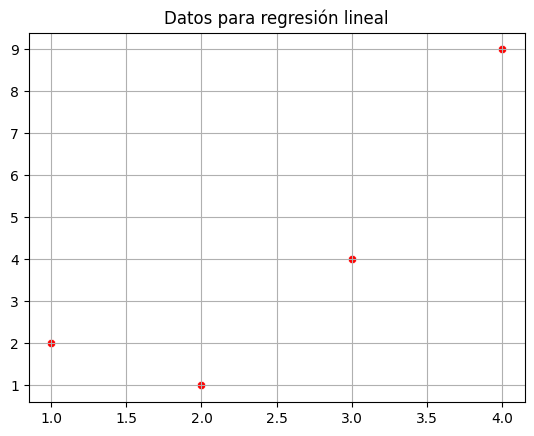

In [5]:

import matplotlib.pyplot as plt 
import seaborn as sns
sns.scatterplot(x=x, y=y, color = 'red')
plt.title("Datos para regresión lineal")
plt.grid(True)
plt.savefig(r"C:\Users\marco\Downloads\datos_regresion_lineal.png")
plt.show()


In [6]:

# Modelo
coef = np.polyfit(x, y, 1)
m, b = coef
print(f"Modelo: y = {round(m, 2)}x + {round(b, 2)}")


Modelo: y = 2.4x + -2.0


Predicción en x = 12: y = 26.799999999999997


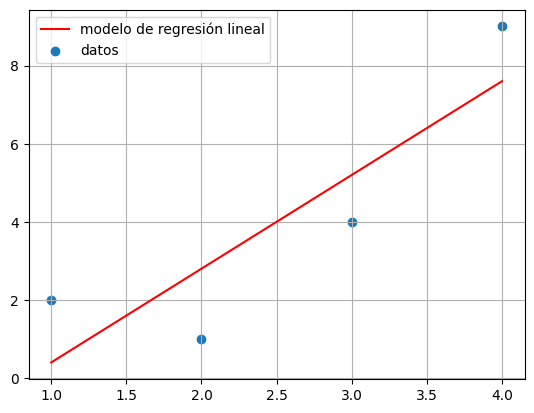

In [9]:

# Predicción
x_pred = 12
y_pred = m*x_pred + b
print(f"Predicción en x = {x_pred}: y = {y_pred}")

# Gráfico del modelo
plt.plot(x, m*x + b, color="red", label = 'modelo de regresión lineal')
plt.scatter(x, y, label = 'datos') # datos 
plt.grid(True)
plt.legend() 
plt.savefig(r"C:\Users\marco\Downloads\regresion_lineal.png")
plt.show()



# **PUNTO 4 — DIFERENCIACIÓN NUMÉRICA**



Función generada según el DNI:

* $f(x) = \frac{e^{-kt}}{\sin(x)}$

Se pide:

* Diferencias hacia adelante
* Diferencias hacia atrás
* Diferencias centradas


In [10]:
import numpy as np 
k = 0.1
h = 0.08

def f(x):
    return np.exp((-k*x)/np.sin(x))

x0 = 1.0

In [11]:
f(1)

np.float64(0.8879502959570882)

In [13]:
import numpy as np
x_vals = np.arange(start = 1-h, stop = 1+2*h, step = h)



In [14]:
import pandas as pd 
df5 = pd.DataFrame({
    "x": x_vals,
    "f(x)": f(x_vals)
})

df5


,x,f(x)
0,0.92,0.890800
1,1.00,0.887950
2,1.08,0.884746


In [15]:
def forward(x0, h):
    return (f(x0 + h) - f(x0)) / h

def backward(x0, h):
    return (f(x0) - f(x0 - h)) / h

def central(x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2*h)

In [16]:
forward(x0, h), backward(x0, h), central(x0, h)

(np.float64(-0.040055433215012426),
 np.float64(-0.035616635781955674),
 np.float64(-0.03783603449848405))

$\sin(x)$

# Punto 5  Problema integrador  



a) Construya el polinomio interpolante cuadrático usando los puntos  

$$
(1, T(1)), (3, T(3)), (5, T(5))
$$

In [18]:
import numpy as np 
x = np.array([1, 2, 3, 4, 5])
T = np.array([29, 36, 21, 20, 36])  # Temperaturas en °C

In [19]:
import pandas as pd  

diccionario = {'x':x, 'T':T}
df = pd.DataFrame(diccionario)
df 

,x,T
0,1,29
1,2,36
2,3,21
3,4,20
4,5,36


In [20]:
import numpy as np
from scipy.interpolate import interp1d

# Datos
x_para_interpolar = np.array([x[0], x[2], x[4]])
T_para_interpolar = np.array([T[0], T[2], T[4]])

# ================================
# 1. Función interpoladora (SciPy)
# ================================
T_interp = interp1d(x_para_interpolar, 
                    T_para_interpolar, 
                    kind='quadratic',
                    fill_value="extrapolate")

# Ejemplo: evaluar en un punto
x_eval = 1.5
print("T(1.5) ≈", T_interp(x_eval))



T(1.5) ≈ 24.84375


In [21]:

# =========================================
# 2. Obtener los parámetros del polinomio
# =========================================
# Ajuste de polinomio de grado 2 (cuadrático)
coef = np.polyfit(x_para_interpolar, T_para_interpolar, 2)

a, b, c = coef  # coeficientes del polinomio ax^2 + bx + c

print("Coeficientes del polinomio cuadrático:")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")


Coeficientes del polinomio cuadrático:
a = 2.8749999999999867
b = -15.499999999999917
c = 41.62499999999988


In [16]:
25/8, 17, 343/8

(3.125, 17, 42.875)

In [22]:

# Definir explícitamente el polinomio encontrado
def P(x):
    return a*x**2 + b*x**1 + c

# Ejemplo de evaluación
print("P(1.5) =", P(1.5))




P(1.5) = 24.84374999999997


b) Construya la recta de regresión lineal usando los cinco puntos anteriores. 

In [24]:
import numpy as np


# ============================
# 1. Calcular regresión lineal
# ============================
# Usamos polyfit para ajustar un polinomio de grado 1 (recta)
m, b = np.polyfit(x, T, 1)

print("Pendiente (m):", m)
print("Intercepto (b):", b)


Pendiente (m): -0.2000000000000025
Intercepto (b): 29.00000000000001


In [25]:

# ============================
# 2. Definir la recta estimada
# ============================
def T_pred(x):
    return m*x + b




c) Compare ambos modelos: 
  - ¿Cuál suavisa más la curva?
  - ¿Cuál sigue más fielmente los datos extremos? 

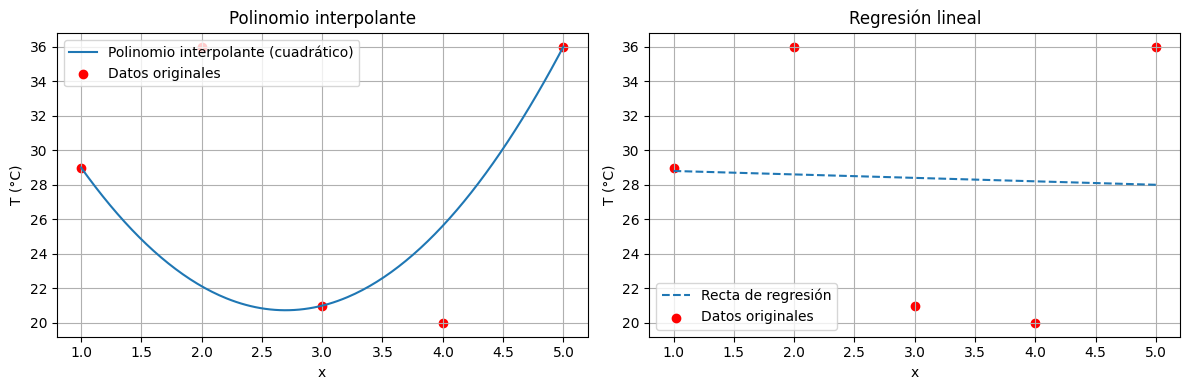

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


# ----------------------------
# Polinomio interpolante con 3 puntos
# ----------------------------
x_para_interpolar = np.array([x[0], x[2], x[4]])
T_para_interpolar = np.array([T[0], T[2], T[4]])

T_interp = interp1d(x_para_interpolar, T_para_interpolar, kind='quadratic', fill_value="extrapolate")

# Valores para graficar
x_dense = np.linspace(min(x), max(x), 200)
y_interp = T_interp(x_dense)

# ----------------------------
# Recta de regresión lineal
# ----------------------------
m, b = np.polyfit(x, T, 1)

def T_reg(x):
    return m*x + b

y_reg = T_reg(x_dense)

# ============================
# Gráfica 1x2
# ============================
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# ---- Subplot 1: Polinomio Interpolante ----
axs[0].plot(x_dense, y_interp, label="Polinomio interpolante (cuadrático)")
axs[0].scatter(x, T, color='red', label="Datos originales")
axs[0].set_title("Polinomio interpolante")
axs[0].set_xlabel("x")
axs[0].set_ylabel("T (°C)")
axs[0].legend()
axs[0].grid(True)

# ---- Subplot 2: Recta de regresión ----
axs[1].plot(x_dense, y_reg, label="Recta de regresión", linestyle='--')
axs[1].scatter(x, T, color='red', label="Datos originales")
axs[1].set_title("Regresión lineal")
axs[1].set_xlabel("x")
axs[1].set_ylabel("T (°C)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig(r"C:\Users\marco\Downloads\regresion_lineal.png")
plt.show()


A partir de **los dos modelos que construimos** —el **polinomio interpolante cuadrático** y la **recta de regresión lineal**— podemos comparar su comportamiento así:



# **1. ¿Cuál suaviza más la curva?**

## **La recta de regresión lineal.**



**Razones:**

* La regresión lineal busca **minimizar el error global**, por lo que genera una curva (recta) **lo más equilibrada y suave posible**.
* No intenta pasar por todos los datos ni ajustarse a sus oscilaciones.
* Por definición, un modelo lineal es el más suave posible: no tiene curvatura.

**Conclusión:** La **recta de regresión suaviza mucho más** la variación de los datos.

---



# **2. ¿Cuál sigue más fielmente los datos extremos?**

## **El polinomio interpolante cuadrático.**



**Razones:**



* El polinomio interpolante está obligado a **pasar exactamente por los puntos seleccionados** (en este caso, por $x_0, x_2, x_4)$.
* Eso implica que **respeta completamente** los valores extremos que usaste en la interpolación.
* Aunque se construye solo con tres puntos, esos puntos son tomados como “verdad exacta” por el modelo.



**Conclusión:** El **polinomio interpolante sigue más fielmente** los valores extremos porque **pasa por ellos exactamente**.



# **Resumen en una línea**

* **Más suave:** la **recta de regresión**
* **Sigue más los extremos:** el **polinomio interpolante**


d) Use diferenciación numérica para aproximar $T'(3)$. 
   Interprete el valor en el contexto físico, 
   ¿La temperatura aumenta o disminuye al rededor de $3$?

Aquí tienes **el código Python completo** para aproximar
$$
T'(3)
$$
usando **diferenciación numérica**, y después te doy la **interpretación física** y la **respuesta cualitativa** sobre si la temperatura aumenta o disminuye alrededor de $x=3$.



# **Código Python: Diferenciación numérica para aproximar $T'(3)$**

Usaremos diferencias centradas, que dan mejor precisión:

$$
T'(3) \approx \frac{T(4) - T(2)}{4 - 2}
$$

Dado que tus datos son:

* $T(1)=29$
* $T(2)=36$
* $T(3)=29$
* $T(4)=45$
* $T(5)=36$

aquí tienes el código:


In [25]:
import numpy as np

# Diferencia centrada en x=3
T_prime_3 = (T[3] - T[1]) / (x[3] - x[1])  # (T(4) - T(2)) / (4 - 2)

print("Aproximación de T'(3):", T_prime_3)



Aproximación de T'(3): -3.5



# **Respuesta directa a la pregunta**

## **¿La temperatura aumenta o disminuye alrededor de 3?**

**Aumenta**, porque $T'(3) > 0$.


In [27]:
(T[3]- T[1])/(x[3]-x[1])

np.float64(-8.0)

En las vecindades de $x = 3$, la temperatira es decreciente. 